In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


Read the data:

In [2]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Perform the EDA:

In [3]:
data.shape

(400, 11)

In [4]:
data['sales']=data['Sales']
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,11.22
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,12.57
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,6.14
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,7.41
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,5.94


In [5]:
data.drop('Sales',axis=1,inplace=True)

In [6]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,12.57
396,139,23,3,37,120,Medium,55,11,No,Yes,6.14
397,162,26,12,368,159,Medium,40,18,Yes,Yes,7.41
398,100,79,7,284,95,Bad,50,12,Yes,Yes,5.94


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder=LabelEncoder()

In [9]:
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['US']=label_encoder.fit_transform(data['US'])
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,9.50
1,111,48,16,260,83,1,65,10,1,1,11.22
2,113,35,10,269,80,2,59,12,1,1,10.06
3,117,100,4,466,97,2,55,14,1,1,7.40
4,141,64,3,340,128,0,38,13,1,0,4.15
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,12.57
396,139,23,3,37,120,2,55,11,0,1,6.14
397,162,26,12,368,159,2,40,18,1,1,7.41
398,100,79,7,284,95,0,50,12,1,1,5.94


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompPrice    400 non-null    int64  
 1   Income       400 non-null    int64  
 2   Advertising  400 non-null    int64  
 3   Population   400 non-null    int64  
 4   Price        400 non-null    int64  
 5   ShelveLoc    400 non-null    int32  
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   Urban        400 non-null    int32  
 9   US           400 non-null    int32  
 10  sales        400 non-null    float64
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [12]:
data[data.duplicated()]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales


In [13]:
data.isnull()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


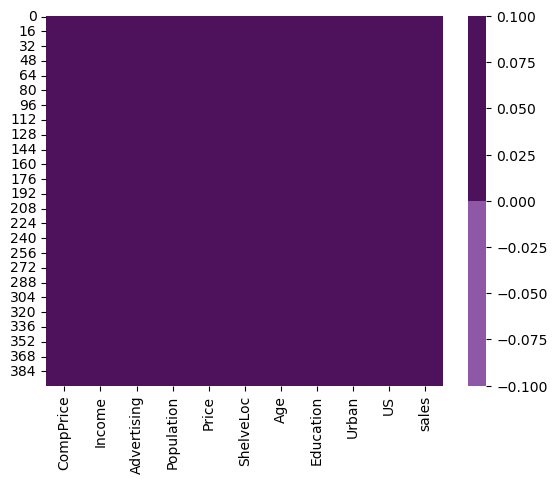

In [14]:
colours = ['#8F58A7','#4D125B'] 
pal = sns.color_palette(colours)
sns.heatmap(data.isnull(), cmap=pal)
plt.show()

Check the Corelation

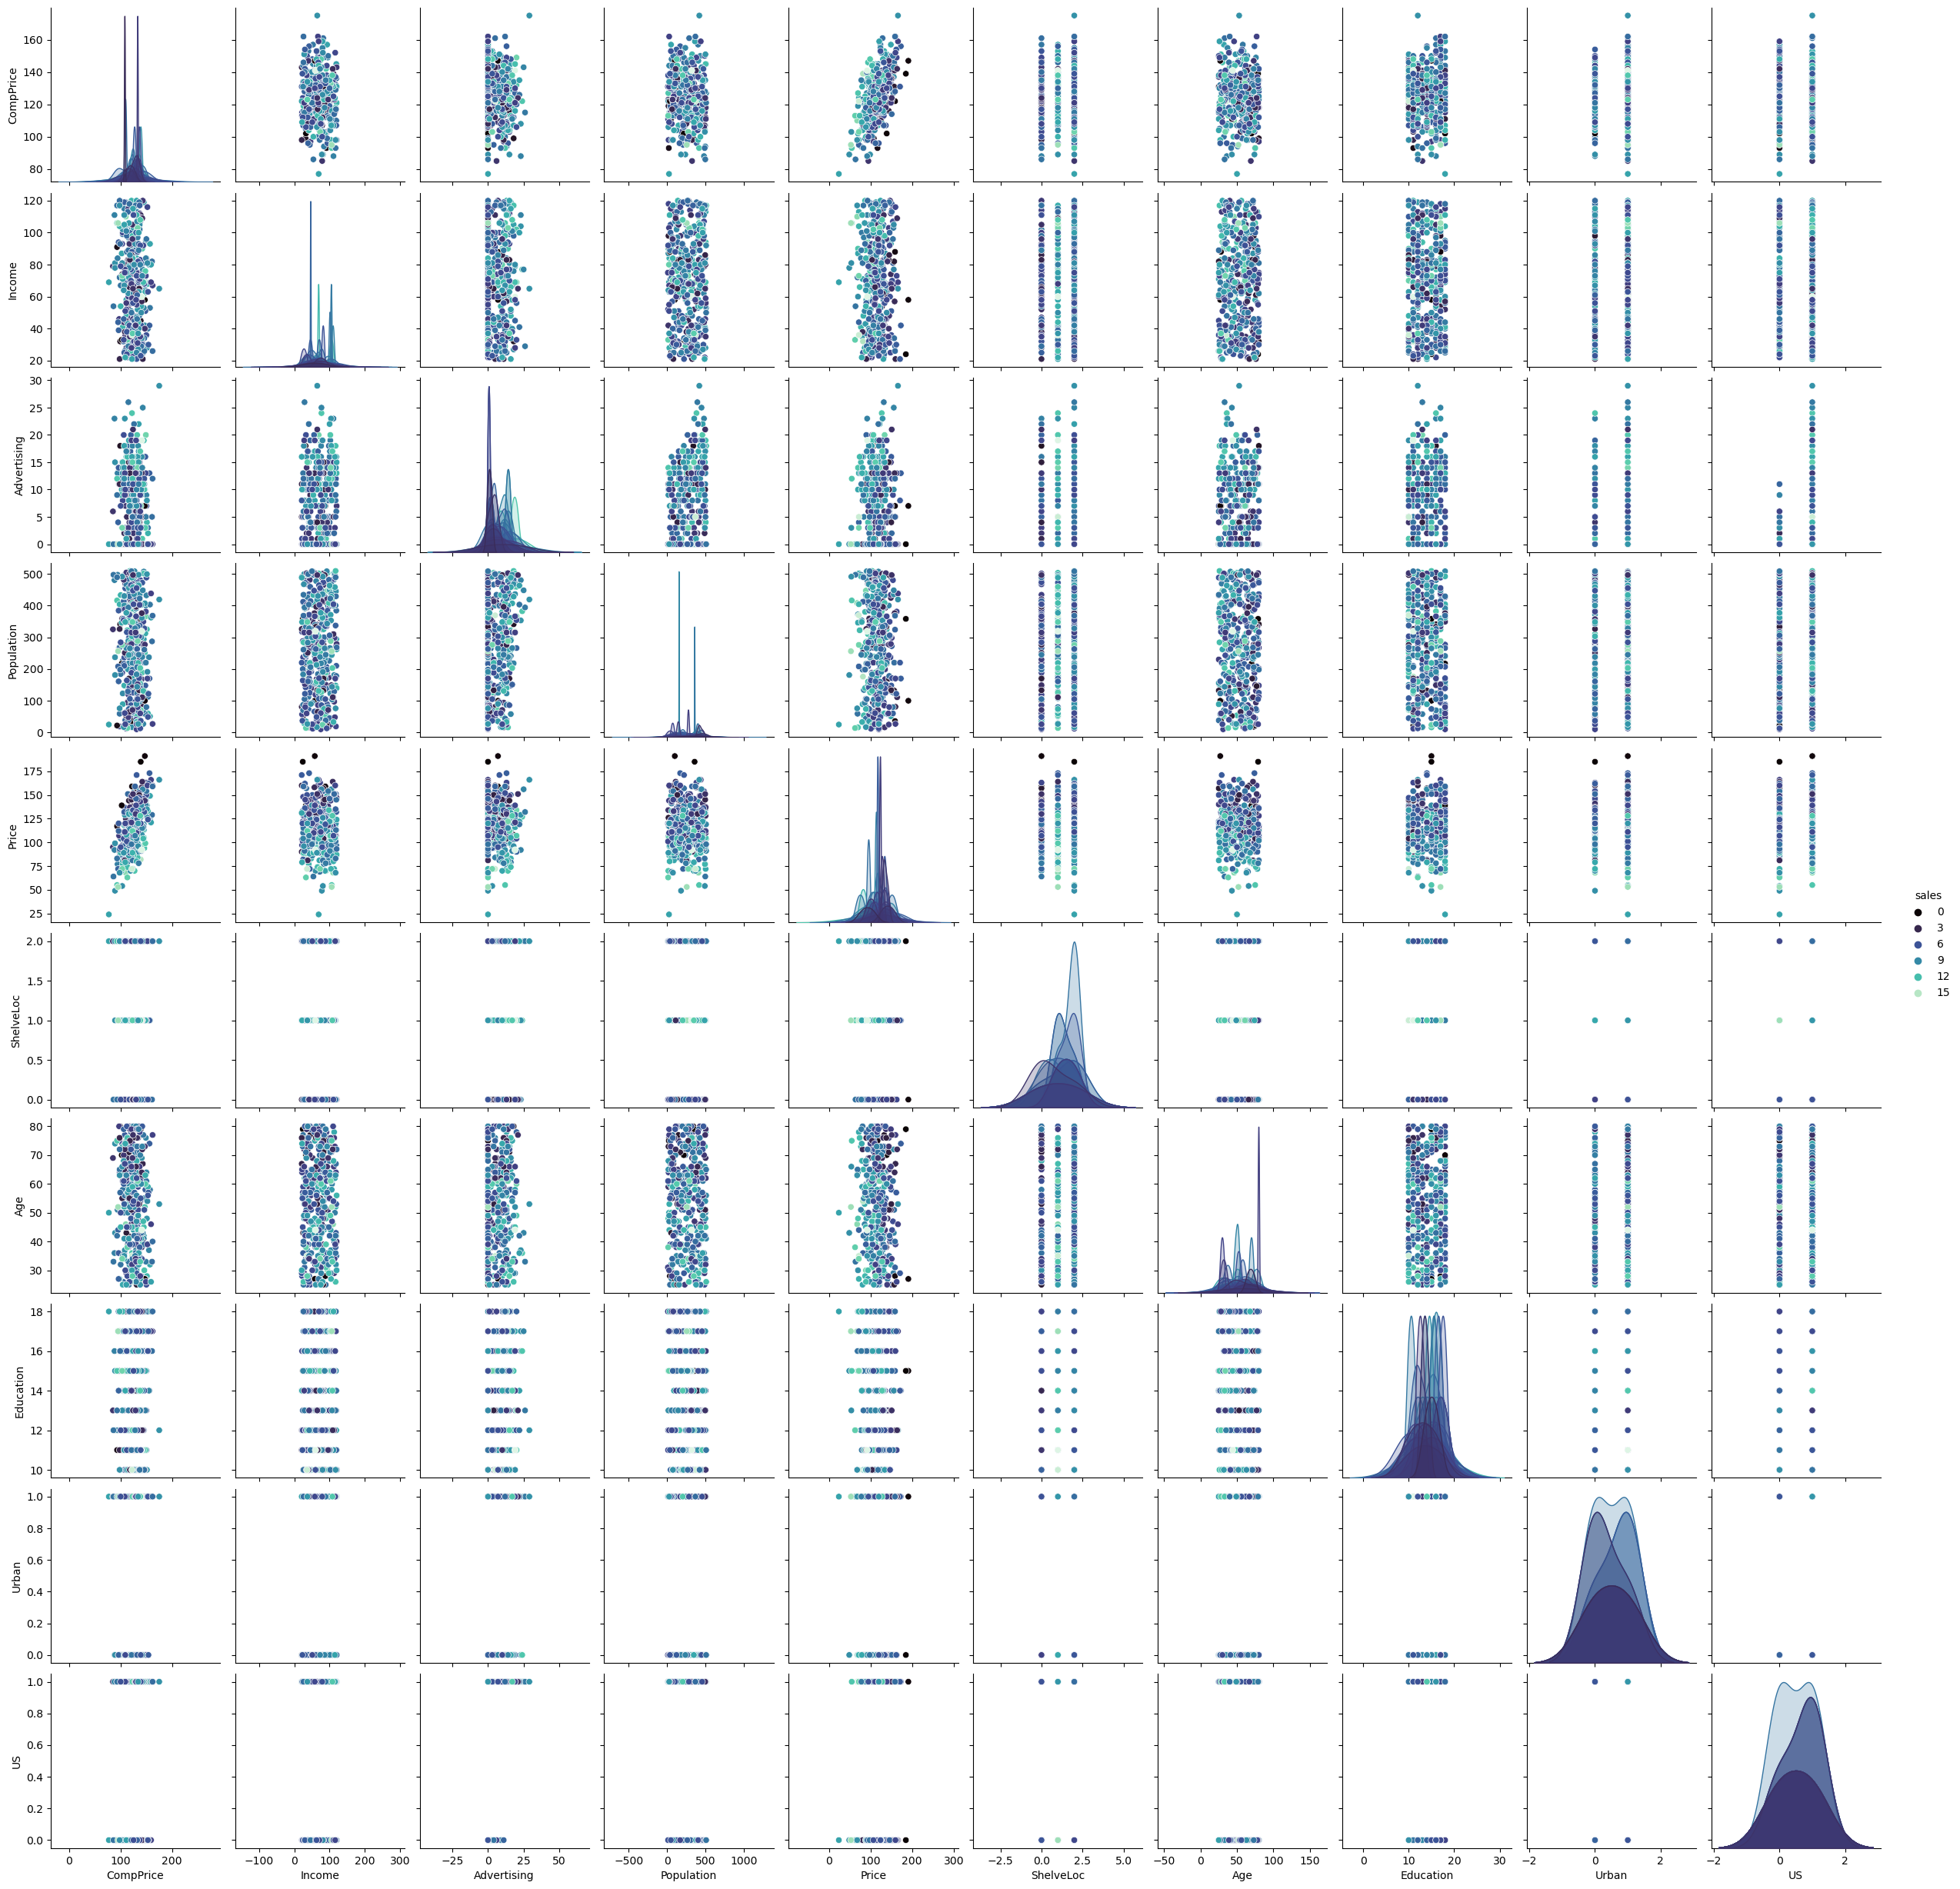

In [15]:
sns.pairplot(data,palette='mako', hue='sales')
plt.show()

In [16]:
data.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.064079
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.151951
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.269507
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.050471
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.444951
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.157470
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.231815
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.051955
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.015419
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,0.177093


[]

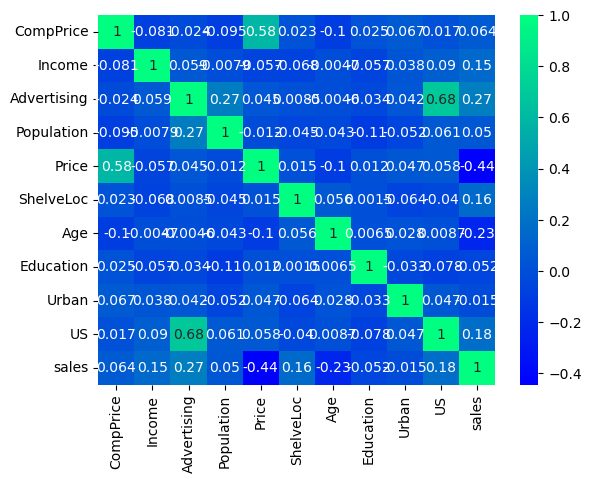

In [17]:
sns.heatmap(data.corr(), cmap='winter', annot=True)
plt.plot()

In [18]:
data.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,7.496325
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,2.824115
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,5.390000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,7.490000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,9.320000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,16.270000


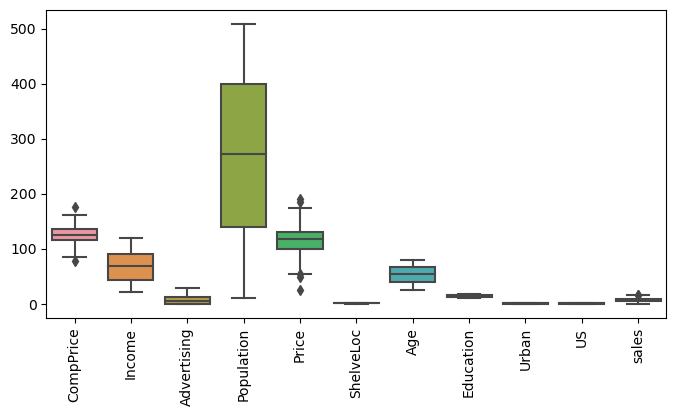

In [19]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = data)
plt.xticks(rotation=90)
plt.show()

Separaate the data

In [20]:
X=data.iloc[:,0:10]
y=data.iloc[:,10]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

Build the model

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model=DecisionTreeRegressor(max_depth=8,min_samples_leaf=10,random_state=42,criterion='squared_error')

In [26]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, random_state=42)

In [27]:
train_pred=model.predict(X_train)

In [28]:
test_pred=model.predict(X_test)

For Regression model , check MSE,RMSE

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)

In [31]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [32]:
train_mse,train_rmse

(2.234485373628747, 1.4948195120578092)

In [33]:
test_mse,test_rmse

(4.453745223943031, 2.110389827482835)

Plot Tree

In [34]:
from sklearn.tree import plot_tree

[Text(0.2578125, 0.9375, 'x[4] <= 94.5\nsquared_error = 7.412\nsamples = 320\nvalue = 7.388'),
 Text(0.05555555555555555, 0.8125, 'x[5] <= 0.5\nsquared_error = 5.659\nsamples = 54\nvalue = 9.755'),
 Text(0.027777777777777776, 0.6875, 'squared_error = 4.888\nsamples = 13\nvalue = 7.861'),
 Text(0.08333333333333333, 0.6875, 'x[5] <= 1.5\nsquared_error = 4.404\nsamples = 41\nvalue = 10.356'),
 Text(0.05555555555555555, 0.5625, 'squared_error = 2.398\nsamples = 13\nvalue = 12.178'),
 Text(0.1111111111111111, 0.5625, 'x[6] <= 49.5\nsquared_error = 3.079\nsamples = 28\nvalue = 9.51'),
 Text(0.08333333333333333, 0.4375, 'squared_error = 1.933\nsamples = 10\nvalue = 10.768'),
 Text(0.1388888888888889, 0.4375, 'squared_error = 2.349\nsamples = 18\nvalue = 8.812'),
 Text(0.4600694444444444, 0.8125, 'x[5] <= 0.5\nsquared_error = 6.4\nsamples = 266\nvalue = 6.908'),
 Text(0.2777777777777778, 0.6875, 'x[4] <= 129.5\nsquared_error = 3.94\nsamples = 64\nvalue = 5.013'),
 Text(0.2222222222222222, 0.56

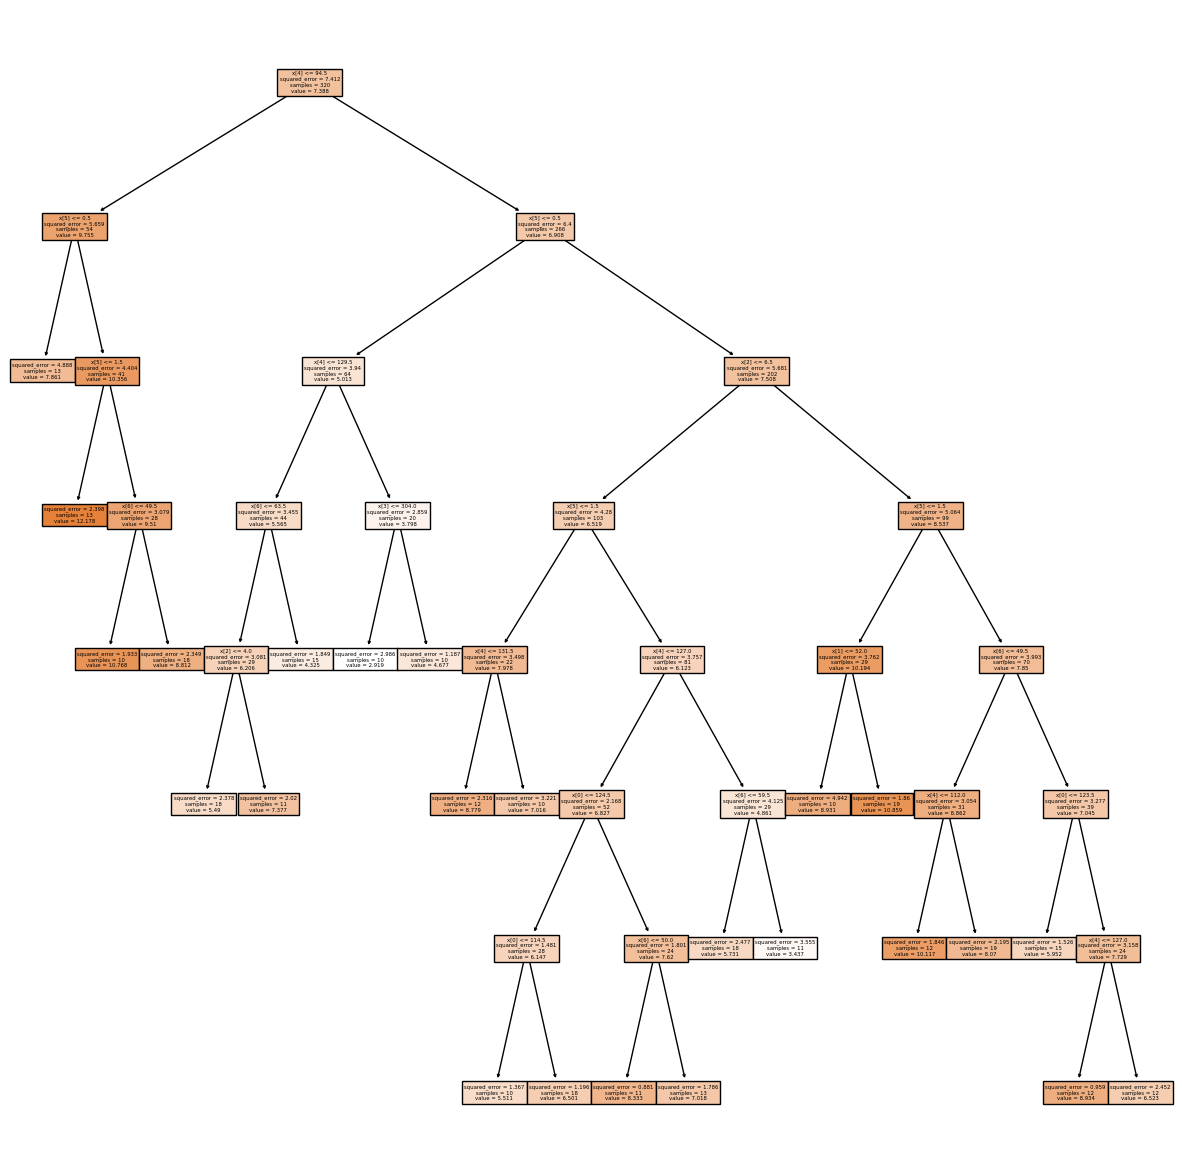

In [35]:
plt.figure(figsize=(15,15))
plot_tree(model,filled=True)

In [36]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,9.50
1,111,48,16,260,83,1,65,10,1,1,11.22
2,113,35,10,269,80,2,59,12,1,1,10.06
3,117,100,4,466,97,2,55,14,1,1,7.40
4,141,64,3,340,128,0,38,13,1,0,4.15
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,12.57
396,139,23,3,37,120,2,55,11,0,1,6.14
397,162,26,12,368,159,2,40,18,1,1,7.41
398,100,79,7,284,95,0,50,12,1,1,5.94


Check with new data

In [37]:
test_data=pd.DataFrame({'CompPrice':115,'Income':50,'Advertising':5,'Population':290,'Price':105,'ShelveLoc':2,'Age':51,'Education':14,'Urban':0,'US':1},index=[1])
test_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,115,50,5,290,105,2,51,14,0,1


In [38]:
model.predict(test_data)

array([6.50055556])

Plot TSNE

In [39]:
from sklearn.manifold import TSNE

In [40]:
modelv=TSNE(n_components=2)

In [41]:
tsne_comps=modelv.fit_transform(X)

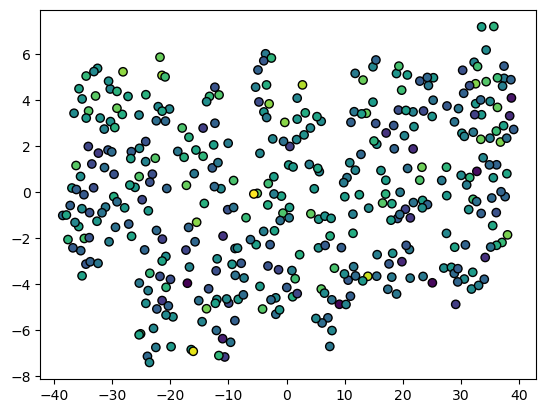

In [42]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolor='k')
plt.show()

# ***************************************************************************************************************************************

# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

Read the data

In [43]:
data1=pd.read_csv('Fraud_check.csv')
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


Perform the EDA

In [44]:
data1.shape

(600, 6)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
data1['Undergrad']=le.fit_transform(data1['Undergrad'])
data1['Marital.Status']=le.fit_transform(data1['Marital.Status'])
data1['Urban']=le.fit_transform(data1['Urban'])

In [48]:
data1.rename(columns={'Marital.Status':'Marital','Taxable.Income':'TaxableI_C','City.Population':'Population','Work.Experience':'Experience'},inplace=True)
data1

,Undergrad,Marital,TaxableI_C,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Undergrad   600 non-null    int32
 1   Marital     600 non-null    int32
 2   TaxableI_C  600 non-null    int64
 3   Population  600 non-null    int64
 4   Experience  600 non-null    int64
 5   Urban       600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [50]:
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [51]:
data1[data1.duplicated()]

,Undergrad,Marital,TaxableI_C,Population,Experience,Urban


In [52]:
data1.isnull()

,Undergrad,Marital,TaxableI_C,Population,Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


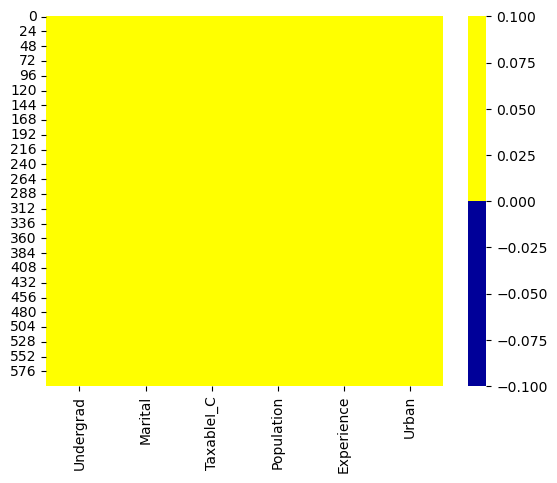

In [53]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(data1.isnull(), cmap=pal)
plt.show()

Check the CO Relation

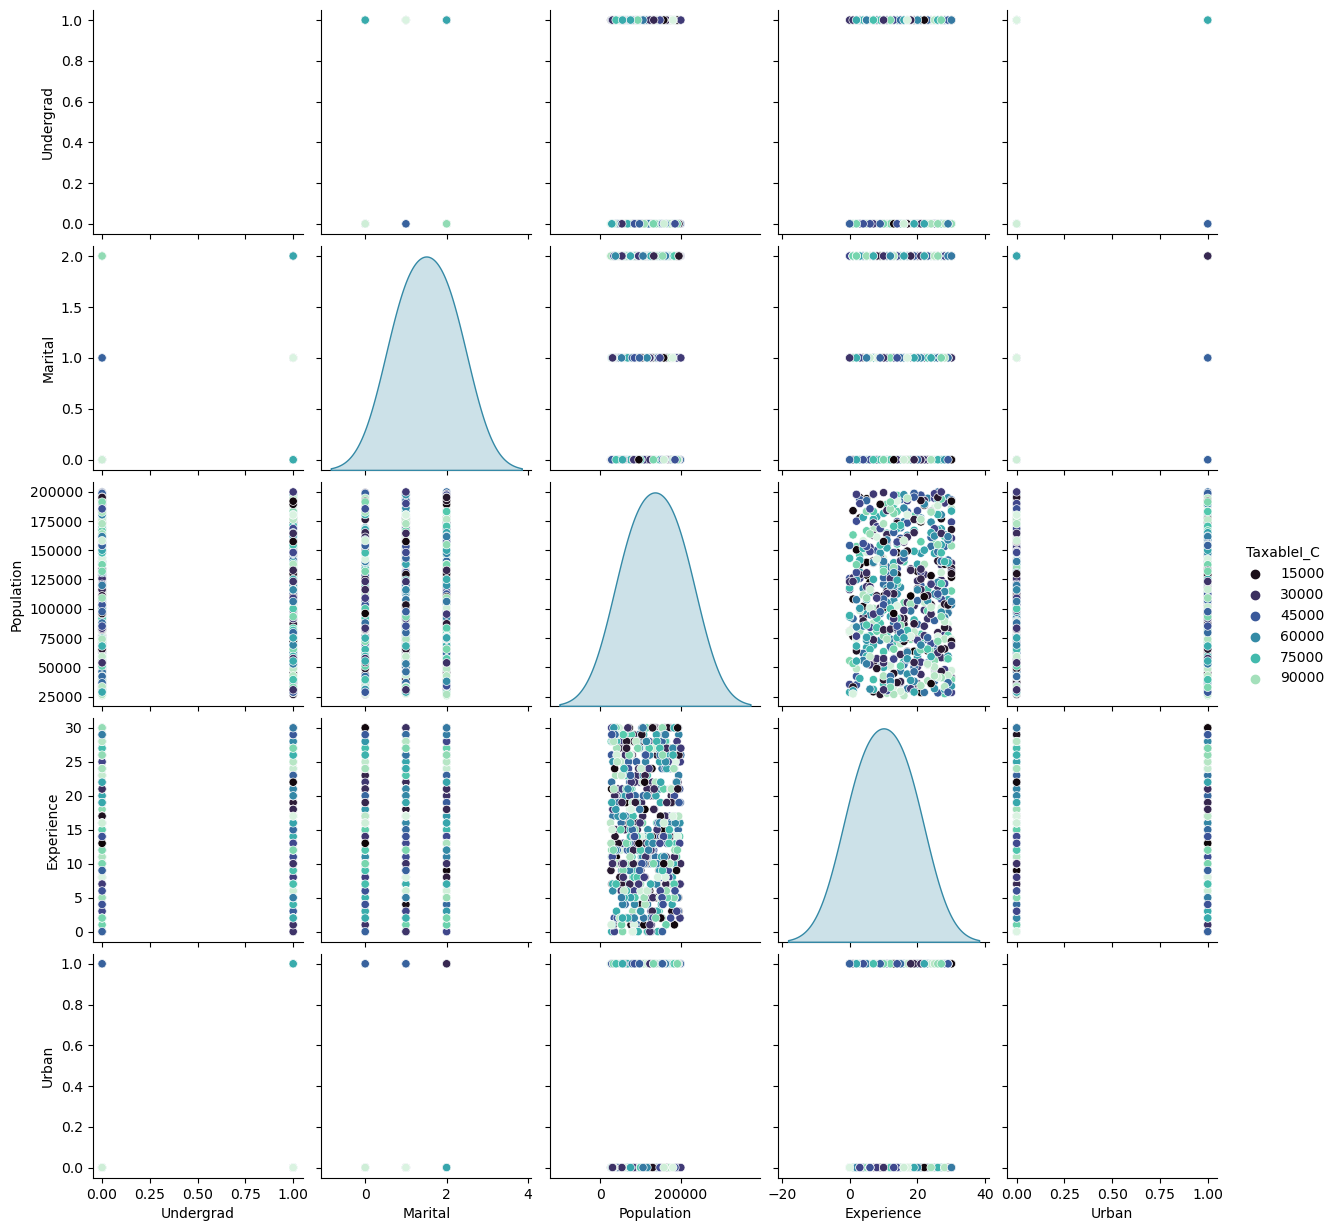

In [54]:
sns.pairplot(data1,palette='mako', hue='TaxableI_C')
plt.show()

In [55]:
data1.corr()

,Undergrad,Marital,TaxableI_C,Population,Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
TaxableI_C,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


[]

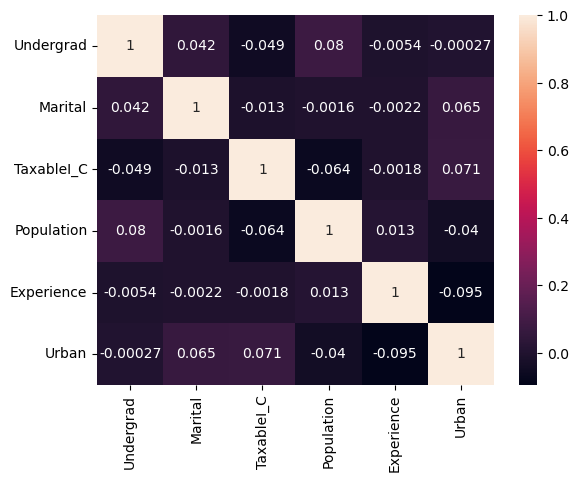

In [56]:
sns.heatmap(data1.corr(), annot=True)
plt.plot()

In [57]:
data1.describe()

,Undergrad,Marital,TaxableI_C,Population,Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


Check for Outliers/Influencers

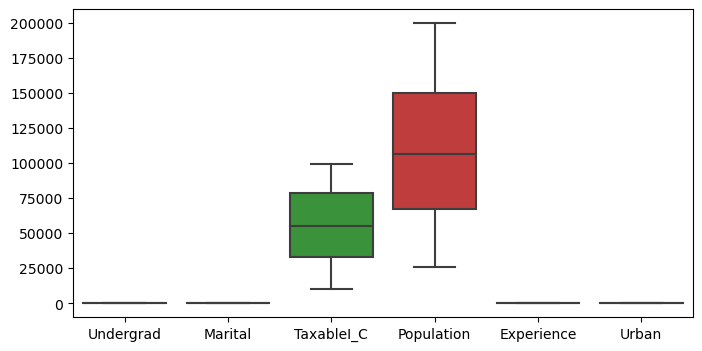

In [58]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = data1)
plt.show()

In [59]:
data1['taxableI_C']=data1['TaxableI_C']

In [60]:
data1.drop('TaxableI_C',axis=1,inplace=True)

In [61]:
data1

,Undergrad,Marital,Population,Experience,Urban,taxableI_C
0,0,2,50047,10,1,68833
1,1,0,134075,18,1,33700
2,0,1,160205,30,1,36925
3,1,2,193264,15,1,50190
4,0,1,27533,28,0,81002
...,...,...,...,...,...,...
595,1,0,39492,7,1,76340
596,1,0,55369,2,1,69967
597,0,0,154058,0,1,47334
598,1,1,180083,17,0,98592


In [62]:
status=[]
for income in data1['taxableI_C']:
    if income <= 30000:
        status.append('Risky')
    else :
        status.append('Good')

In [63]:
data1['Status']=status

In [64]:
data1

,Undergrad,Marital,Population,Experience,Urban,taxableI_C,Status
0,0,2,50047,10,1,68833,Good
1,1,0,134075,18,1,33700,Good
2,0,1,160205,30,1,36925,Good
3,1,2,193264,15,1,50190,Good
4,0,1,27533,28,0,81002,Good
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,Good
596,1,0,55369,2,1,69967,Good
597,0,0,154058,0,1,47334,Good
598,1,1,180083,17,0,98592,Good


In [65]:
data1['Status']=le.fit_transform(data1['Status'])
data1

,Undergrad,Marital,Population,Experience,Urban,taxableI_C,Status
0,0,2,50047,10,1,68833,0
1,1,0,134075,18,1,33700,0
2,0,1,160205,30,1,36925,0
3,1,2,193264,15,1,50190,0
4,0,1,27533,28,0,81002,0
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,0
596,1,0,55369,2,1,69967,0
597,0,0,154058,0,1,47334,0
598,1,1,180083,17,0,98592,0


In [66]:
data1.drop('taxableI_C',axis=1,inplace=True)

In [67]:
data1

,Undergrad,Marital,Population,Experience,Urban,Status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


Segregate the Data

In [68]:
X=data1.iloc[:,:5]
y=data1.iloc[:,5]

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

Build the model

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
modelf=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,random_state=42,criterion='gini')

In [73]:
modelf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)

In [74]:
train_pred1=modelf.predict(X_train)

In [75]:
test_pred1=modelf.predict(X_test)

Confusion Matrix and Classification Report

In [76]:
from sklearn.metrics import confusion_matrix,classification_report

In [77]:
confusion_matrix(y_train,train_pred1)

array([[375,   7],
       [ 88,  10]], dtype=int64)

In [78]:
print(classification_report(y_train,train_pred1))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       382
           1       0.59      0.10      0.17        98

    accuracy                           0.80       480
   macro avg       0.70      0.54      0.53       480
weighted avg       0.76      0.80      0.74       480



In [79]:
confusion_matrix(y_test,test_pred1)

array([[94,  0],
       [25,  1]], dtype=int64)

In [80]:
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        94
           1       1.00      0.04      0.07        26

    accuracy                           0.79       120
   macro avg       0.89      0.52      0.48       120
weighted avg       0.84      0.79      0.71       120



In [81]:
fnames=data1.columns
fnames

Index(['Undergrad', 'Marital', 'Population', 'Experience', 'Urban', 'Status'], dtype='object')

In [82]:
cname=data1['Status'].unique()
cname

array([0, 1])

PLot the Tree

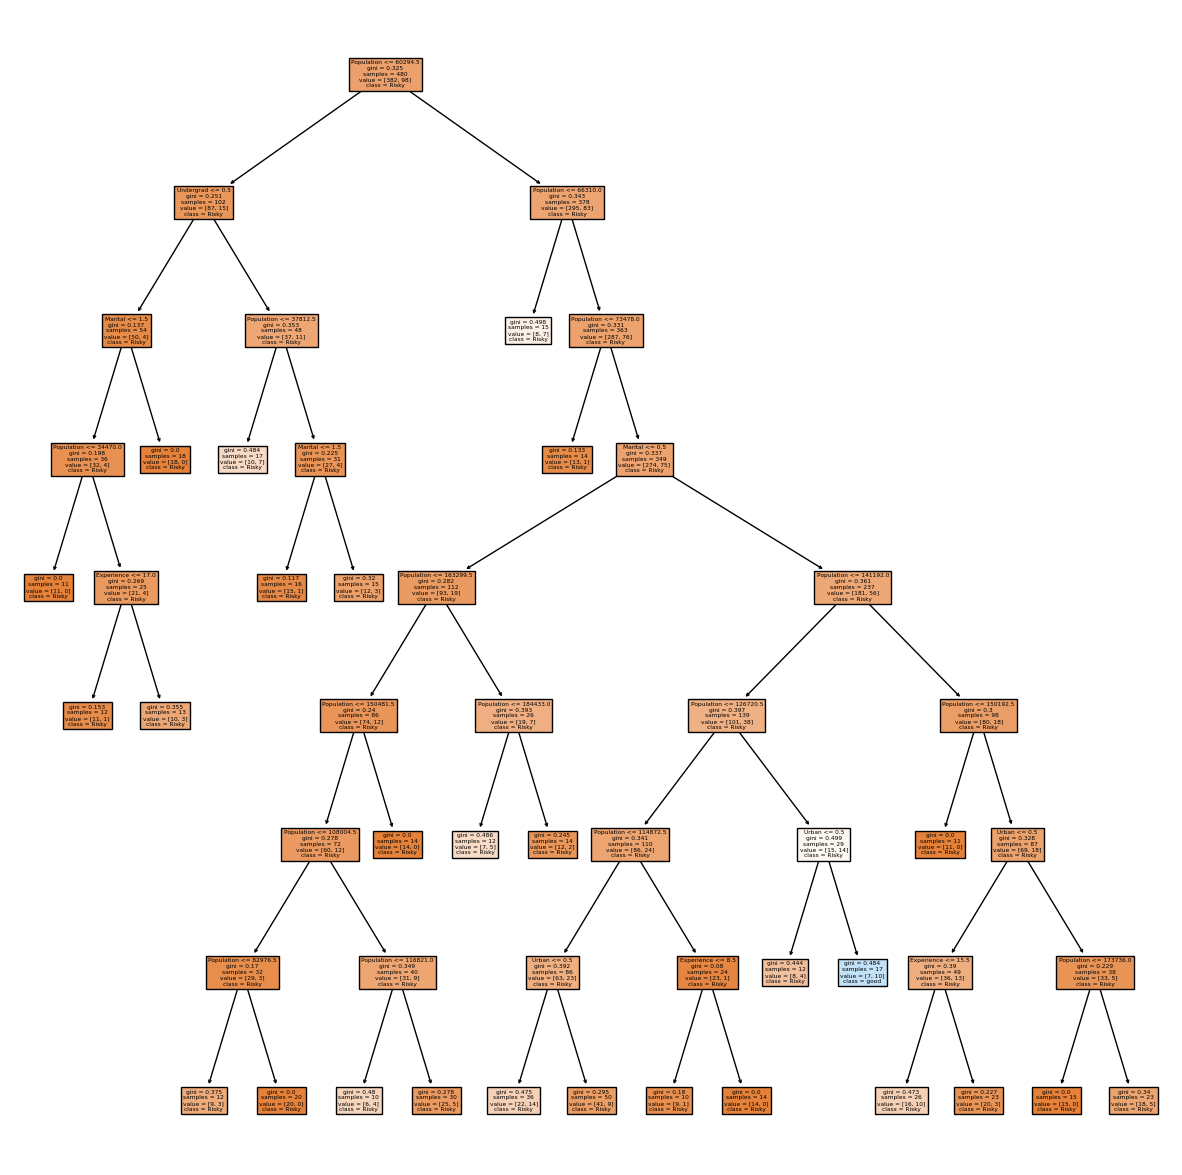

In [83]:
plt.figure(figsize=(15,15))
class_names=['Risky','good']
feature_names=fnames.drop('Status').tolist()
plot_tree(modelf,feature_names=feature_names,class_names=class_names,filled=True)
plt.show()

Visualize the data

In [84]:
modelf1=TSNE(n_components=2)

In [85]:
tsne_comps=modelf1.fit_transform(X)

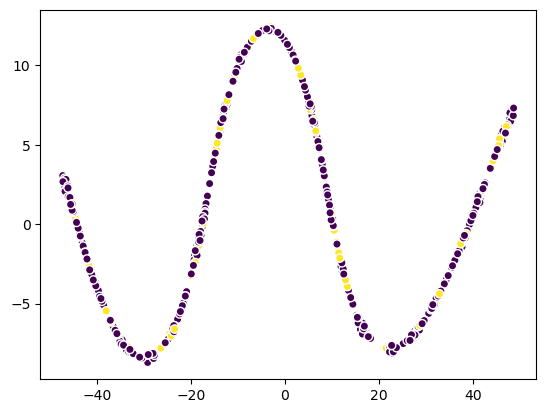

In [86]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolor='white')
plt.show()

In [87]:
data1

,Undergrad,Marital,Population,Experience,Urban,Status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


Test with new data

In [88]:
test_data1=pd.DataFrame({'Undergrad':0,'Marital':2,'Population':17000,'Experience':20,'Urban':1},index=[1])
test_data1

,Undergrad,Marital,Population,Experience,Urban
1,0,2,17000,20,1


In [90]:
modelf.predict(test_data1)

array([0])

It says the test data 1 is 'Risky'

# *************************************************************************************************************************************